In [1]:
# !pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [3]:
# Import librabries
import pandas as pd #interacting with dataframe
import numpy as np #for arrays
import seaborn as sns #For viz
import matplotlib.pyplot as plt  #viz

# import yfinance as yf
import plotly.express as px

# from tensorflow.keras.layers import LSTM

In [4]:
# batsl = yf.Ticker("BATS.L")

In [5]:
# start = "2004-06-07"
# end = "2024-06-06"

# batsl_data = batsl.history(start=start, end=end)

In [6]:
# batsl_data.columns

#Read Data

In [7]:
# Read the data
batsl = pd.read_csv('/content/drive/MyDrive/BATS.L.csv')

batsl.head() # Display the first five rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,07/06/2004,808.0,812.0,802.0,803.5,292.276001,36926228.0
1,08/06/2004,804.5,810.5,794.5,806.5,293.367157,10061894.0
2,09/06/2004,811.0,813.0,805.0,807.0,293.549133,3902359.0
3,10/06/2004,801.5,806.0,796.0,802.0,291.730286,9393473.0
4,11/06/2004,804.0,804.5,795.0,797.0,289.911591,5243904.0


In [ ]:
batsl.columns # List of columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#Columns



1.   Date
2.   Open: Open stock price that day

1.   High: The highest price that day/daily high price
2.   Low: The lowest price that day

1.   CLose: The closing price
2.   Adj Close: The adjusted stock price after taking dividends, stock splits, and others into consideration

1.   The volume of stocks traded that day
















In [ ]:
batsl.dtypes #Return datatypes of each column

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

###All Float except date

In [ ]:
batsl.describe() #Statistical summary

,Open,High,Low,Close,Adj Close,Volume
count,5064.00000,5064.000000,5064.000000,5064.000000,5064.000000,5.064000e+03
mean,2778.48750,2804.547012,2749.826155,2778.093561,1696.936030,4.523278e+06
std,1060.10901,1068.560536,1051.661735,1059.955640,840.516475,3.769993e+06
min,787.00000,799.500000,116.500000,793.000000,289.911591,0.000000e+00
25%,1902.00000,1923.750000,1882.000000,1899.750000,814.373261,2.548031e+06
50%,2788.50000,2820.541992,2762.750000,2793.000000,1872.008850,3.550992e+06
75%,3446.00000,3473.000000,3413.125000,3446.625000,2305.930420,5.309099e+06
max,5624.00000,5643.600098,5569.000000,5643.000000,3492.124756,9.608739e+07


#Exploratory Data Analysis


1.   Univariate Analysis
2.   Multivariate Analysis



In [ ]:
# Missing values

print(batsl.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [ ]:
batsl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#Univariate Analysis

##Trends Using Charts



1.   Closing price trend from 2004-2024




In [ ]:
# Line chart using plotly.express
batsl_close = px.line(batsl,
                      x='Date',
                      y='Close',
                      title='British American Tobacco closing prices (2004-2024)',
                      color_discrete_sequence=['blue'], # Color of line
                      width=1000, height=800)

batsl_close.show() #Show plot

#2.Column'Open'

In [ ]:
# Repeat same for open price
batsl_open = px.line(batsl,
                     x='Date',
                     y='Open',
                     title='British American Tobacco Open prices (2004-2024)',
                     color_discrete_sequence=['green'],
                     width=1000, height=800)

batsl_open.show() # Show plot

In [ ]:
batsl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# fig = px.line(batsl,
#               x='Date',
#               y='Close',
#               title='British American Tobacco closing prices (2004-2024)',
#               color_discrete_sequence=['blue'],
#               width=1000, height=800)

# fig.add_scatter(x=batsl['Date'], y=batsl['Open'], mode='lines', name='British American Tobacco Open prices (2004-2024)')

# fig.show()

###3.Adjusted Close

In [ ]:
batsl_close = px.line(batsl,
                      x='Date',
                      y='Adj Close',
                      title='British American Tobacco adjusted closing prices (2004-2024)',
                      color_discrete_sequence=['blue'],
                      width=1000, height=800)

batsl_close.show()

###4.Adjusted Close Vs Close

###To show how much the adjusted close price differs from the close price

<Axes: title={'center': 'Close price vs Adjusted close price'}, xlabel='Date'>

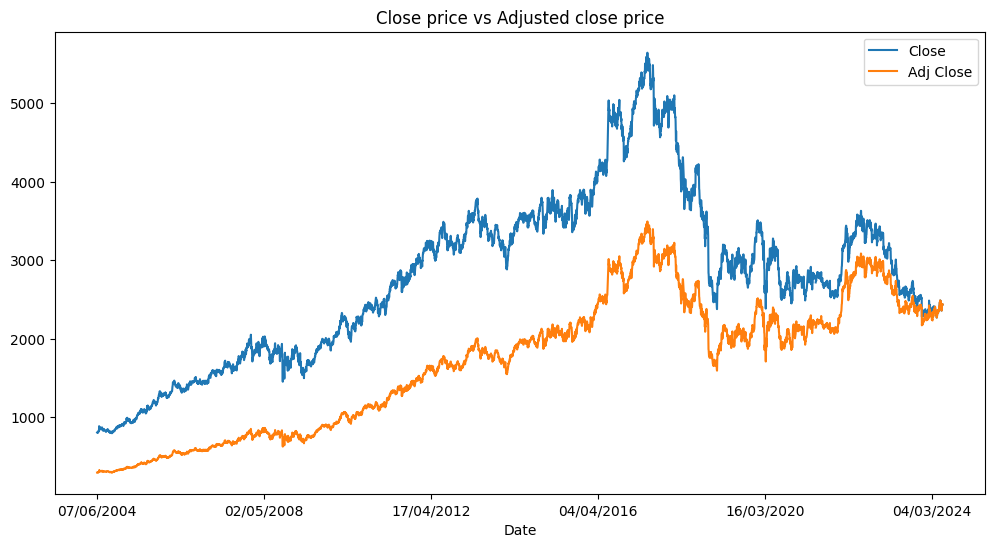

In [ ]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
batsl.plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price')

###5.Do The Same For Open and Close Prices

<Axes: title={'center': 'Open price vs Close price'}, xlabel='Date'>

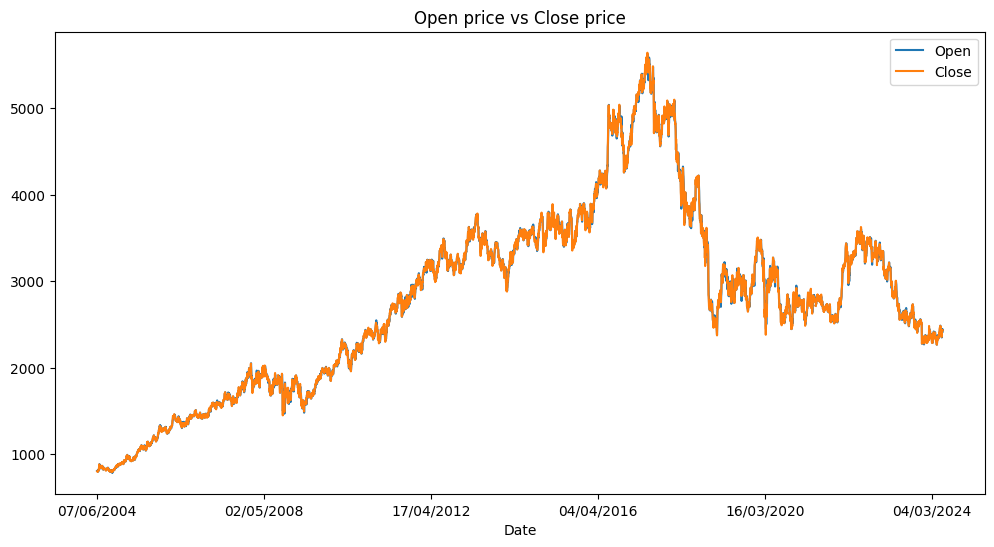

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.plot(x='Date', y=['Open','Close'], ax=ax, title = 'Open price vs Close price')

###6.Open Price Vs High

<Axes: title={'center': 'Open price vs High'}, xlabel='Date'>

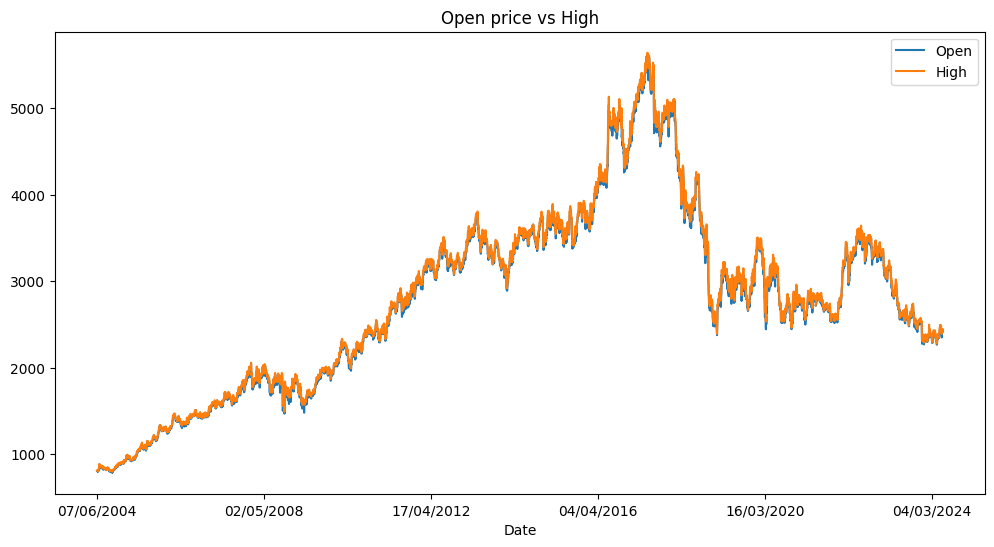

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.plot(x='Date', y=['Open','High'], ax=ax, title = 'Open price vs High')

###7.Open Price Vs Low

<Axes: title={'center': 'Open price vs Low'}, xlabel='Date'>

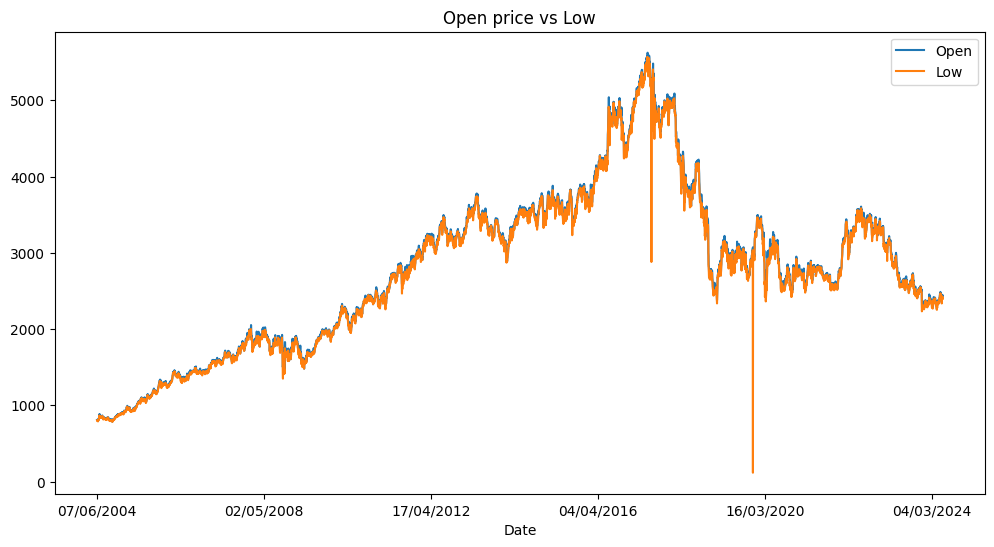

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.plot(x='Date', y=['Open','Low'], ax=ax, title = 'Open price vs Low')

###This plot is the same as above, but I used plotly to be able to interact with the plot and see the dates with absymal prices

In [ ]:
fig = px.line(batsl,
              x='Date',
              y='Open',
              title='British American Tobacco Open prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.add_scatter(x=batsl['Date'], y=batsl['Low'], mode='lines')

fig.show()

Looking at the graph above, there are two dates there were irregular low prices, 10/07/2017 and 02/12/2019

In [ ]:
#Irregular low prices dates
low_dates = ['10/07/2017', '02/12/2019']

# Select the rows of those dates
batsl[batsl['Date'].isin(low_dates)]

,Date,Open,High,Low,Close,Adj Close,Volume
3320,10/07/2017,5220.0,5241.810059,2879.889893,5210.0,3224.166016,2523085.0
3928,02/12/2019,3072.5,3139.000000,116.500000,3050.0,2152.164307,3408746.0


In July 2017, BAT acquired Reynolds American Inc, to see if the news surrounding this merger affected the stock price and caused the price drop, we will plot a line chart of stock prices in July, 2017

In [ ]:
# Convert dates to datetime
batsl['Date'] = pd.to_datetime(batsl['Date'], format='%d/%m/%Y')

#Define start and end dates in July 2017
start = '07/01/2017'
end = '07/31/2017'

july_2017 = batsl[(batsl['Date'] >= start) & (batsl['Date'] <= end)]

july_2017.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3315,2017-07-03,5214.0,5253.0,5210.000000,5236.0,3240.256348,2503098.0
3316,2017-07-04,5205.0,5228.0,5177.000000,5177.0,3203.744141,2095120.0
3317,2017-07-05,5177.0,5262.0,5160.000000,5257.0,3253.252686,3326153.0
3318,2017-07-06,5246.0,5277.0,5157.669922,5184.0,3208.076172,3188843.0
3319,2017-07-07,5168.0,5247.0,5160.000000,5219.0,3229.735352,3100051.0


In [ ]:
fig = px.line(july_2017,
              x='Date',
              y='Low',
              title='British American Tobacco Low prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.show()

The low on the 10th quickly bounced back on the 11th

###8.Daily returns

In [ ]:
# Calculate and create a new column on the daily returns which is the percentage in the stock price from one day to the next
batsl['Daily returns'] = batsl['Close'].pct_change()*100

fig = px.line(batsl,
              x='Date',
              y='Daily returns',
              title='British American Tobacco Daily returns (2004-2024)',
              color_discrete_sequence=['green'],
              labels={'Daily Return': 'Daily Return (%)', 'Date': 'Date'},
              hover_data={'Date': True, 'Daily returns': ':.2f'},
              width=1000, height=800)

fig.show() # Show the plot

12.78% in October 2008 was the highest daily return in the 21 year period

In [ ]:
batsl.head() # Display first five rows

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns
0,2004-06-07,808.0,812.0,802.0,803.5,292.276001,36926228.0,NaN
1,2004-06-08,804.5,810.5,794.5,806.5,293.367157,10061894.0,0.373367
2,2004-06-09,811.0,813.0,805.0,807.0,293.549133,3902359.0,0.061996
3,2004-06-10,801.5,806.0,796.0,802.0,291.730286,9393473.0,-0.619579
4,2004-06-11,804.0,804.5,795.0,797.0,289.911591,5243904.0,-0.623441


9.Distribution of Open, High, Low, Close

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']


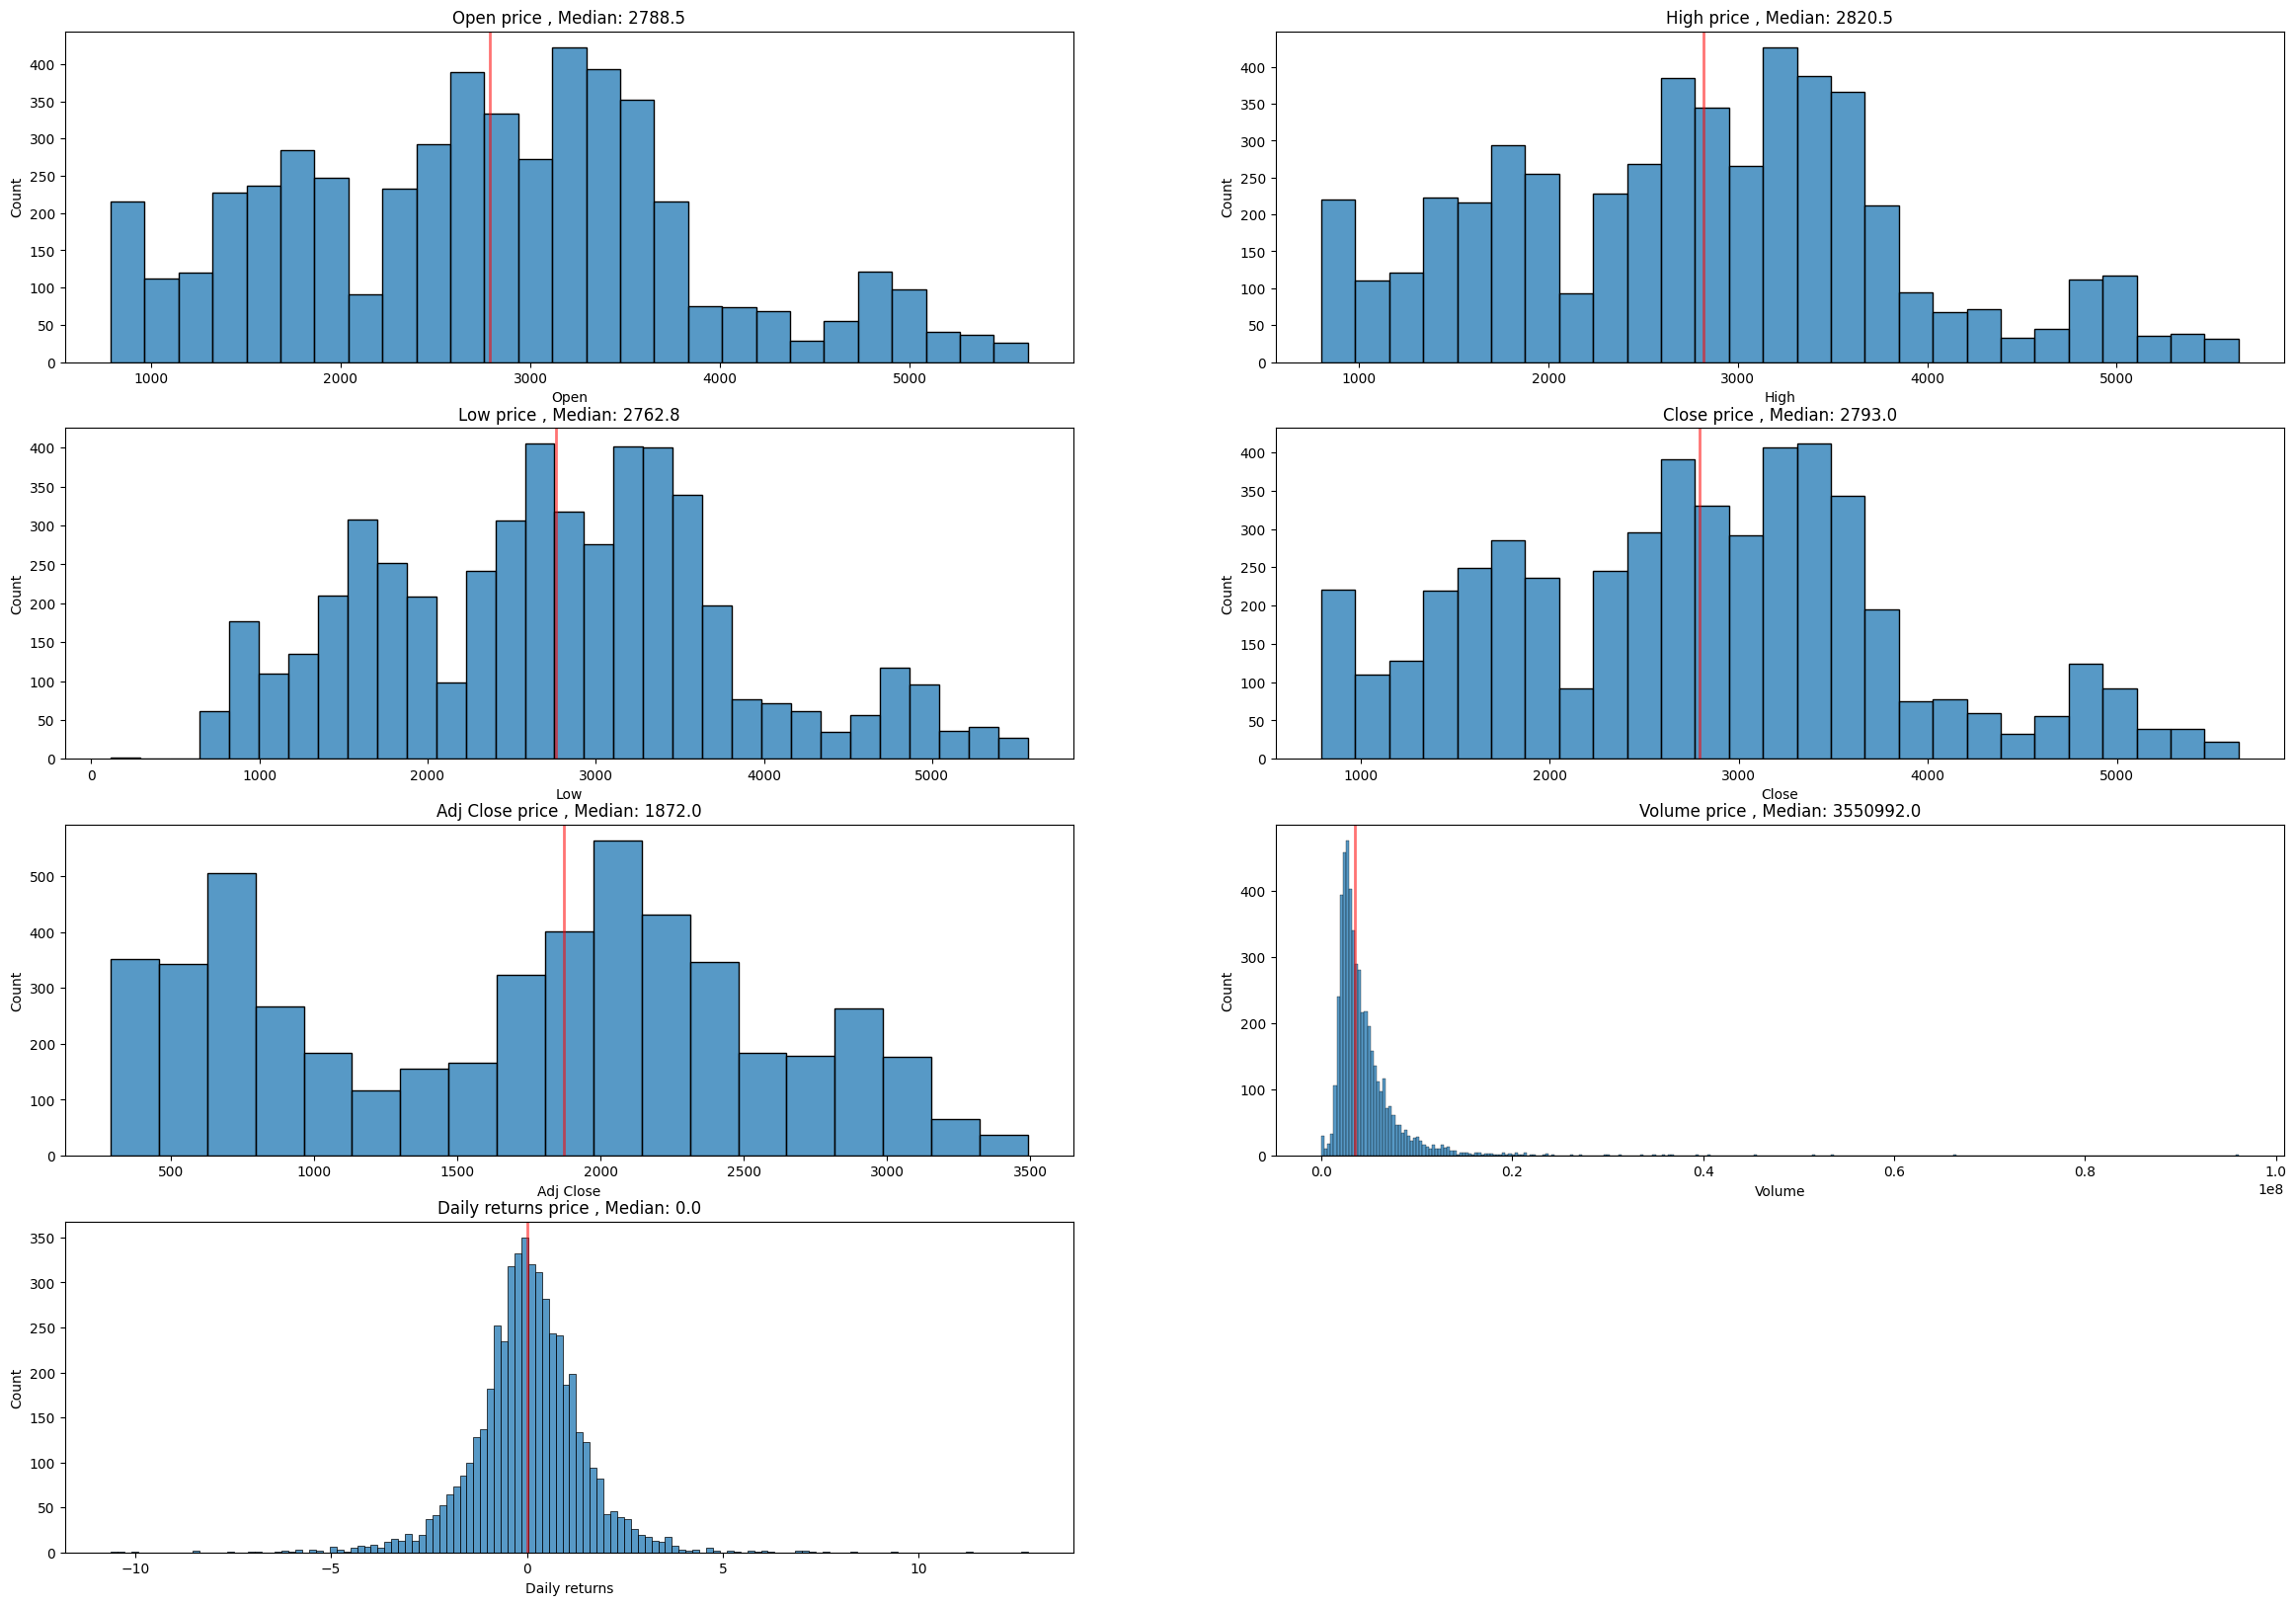

In [ ]:
cols = batsl.columns.tolist()[1:] # all columns except date

fig, axes = plt.subplots(4,2, figsize=(29,20))

for i, ax in enumerate(axes.flatten()):
    if i < len(cols):
        sns.histplot(batsl[cols[i]], ax=ax)
        median = batsl[cols[i]].median()
        ax.set_title(f"{cols[i]} price , Median: {median:0.1f}")
        ax.axvline(median, color ='red', lw=2, alpha = 0.55)
    else:
        # Hide the subplot if there are no more columns to plot
        ax.axis('off')
print(cols)

The plot above shows the distribution of the prices, also showing the median price for the period 2004-2024

###Heatmap / correlation

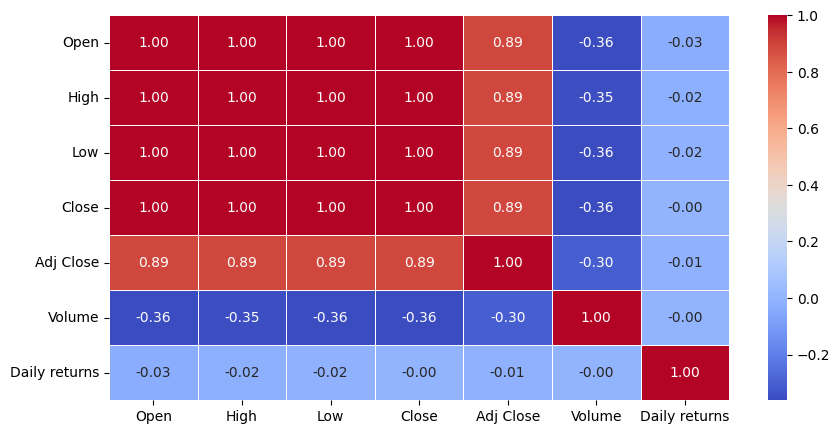

In [ ]:
corr_matrix = batsl[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']].corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Create heatmap

fig.show() # Show plot

###Candlestick Chart

Candlestick charts have been adopted most recently in cryptocurrency where increase in price is shown in green, and decrease is shown in red against time. The candlestick chart has an adjustable date axis to show the variation and trend in prices within a specific date

In [ ]:
import plotly.graph_objects as go

# Candlestick chart
figure = go.Figure(data=[go.Candlestick(
    x=batsl['Date'],
    open=batsl['Open'],
    high=batsl['High'],
    low=batsl['Low'],
    close=batsl['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Updating the layout with titles and defining graph size
figure.update_layout(
    title='British American Tobacco Candlestick Chart (2004-2024)', # Graph title
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1000,
    height=800
)

# Show the chart

###Outlier Detection

Box plots will be used for this

In [ ]:
batsl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily returns'],
      dtype='object')

In [ ]:
# Box plot to show outliers / percentile
fig = px.box(
    batsl,
    y=['Open', 'Close', 'High', 'Low', 'Adj Close'], # All columns except volume
    title = 'Outlier detection for British American Tobacco Prices (2004-2024)',
    width=1000,
    height=600
)

fig.show() # Show the plot

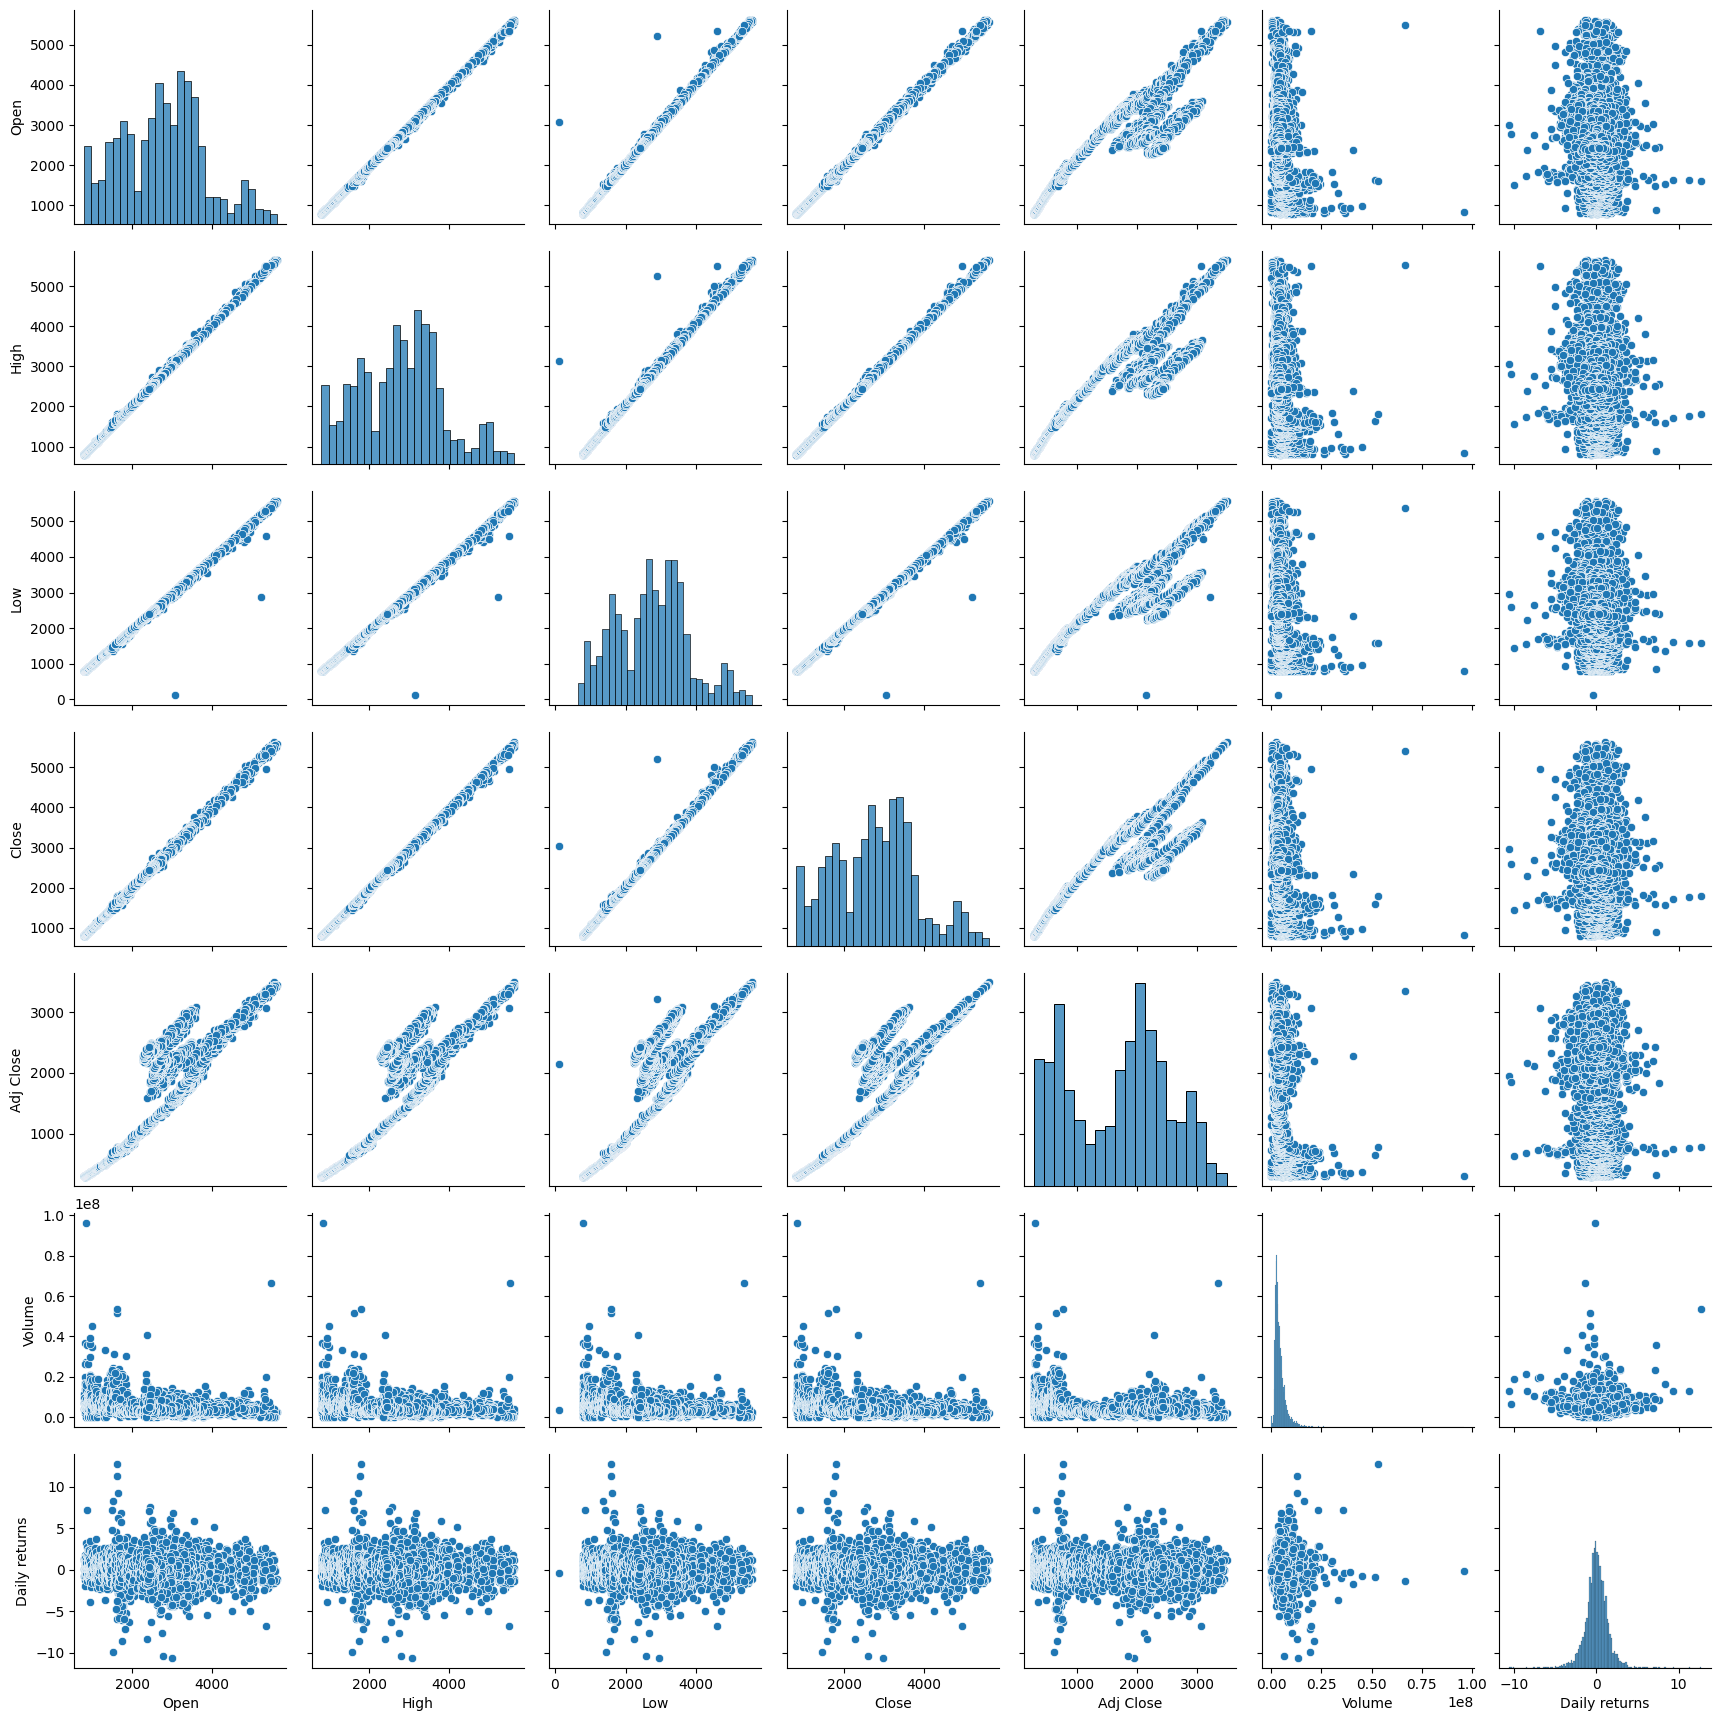

In [ ]:
sns.pairplot(batsl)

###Understanding the trading volume column

To understand and perform exploratory data analysis on the volume column, the following will be done:

1.Descriptive statistics

2.A histogram

3.Boxplot to show outliers

###Descriptive Statistics

In [ ]:
# Get summary statistics of the volume column
summ_vol = batsl['Volume'].describe()

print(summ_vol) # Print result

count    5.064000e+03
mean     4.523278e+06
std      3.769993e+06
min      0.000000e+00
25%      2.548031e+06
50%      3.550992e+06
75%      5.309099e+06
max      9.608739e+07
Name: Volume, dtype: float64


###Distribution-Histogram

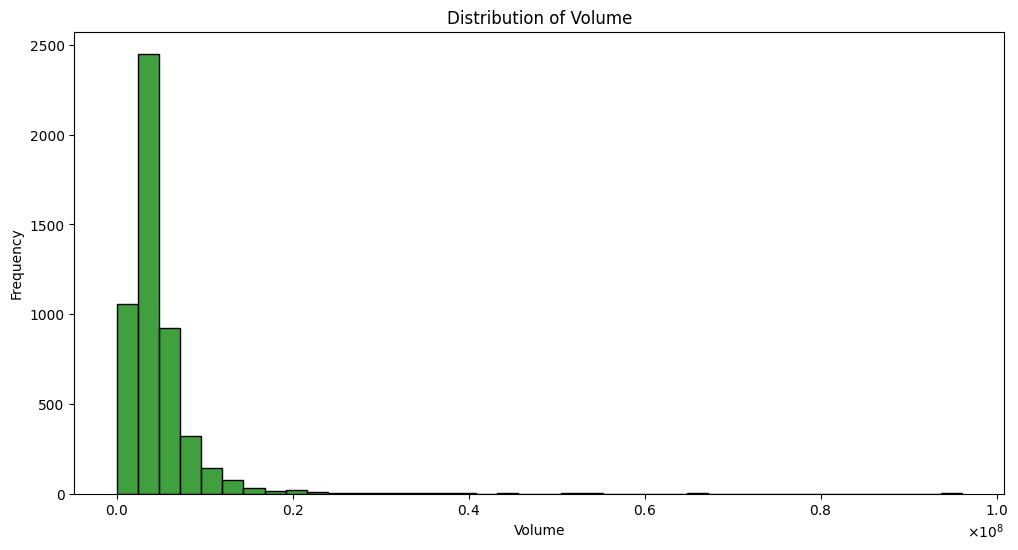

In [ ]:
import matplotlib.ticker as ticker #To specify tick format

plt.figure(figsize=(12, 6)) # Create figure object with specific size

sns.histplot(batsl['Volume'], color='green', bins=40) # Plot histogram to show distribution
plt.title('Distribution of Volume') # Set chart tile
plt.xlabel('Volume') # Set x axis title
plt.ylabel('Frequency') # Set y axis title

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True)) # To turn the x axis to normal figure format

plt.show() # Show plot

###Box Plot

In [ ]:
fig = px.box(
    batsl,
    y=['Volume'], # Volume column
    title = 'Volume - British American Tobacco Prices (2004-2024)',
    width=1000,
    height=600)

fig.show() # Show the plot

#Data Preprocessing

###Missing Values

In [ ]:
print(batsl.isnull().sum()) #Print the number of missing values in each column

Date             0
Open             1
High             1
Low              1
Close            1
Adj Close        1
Volume           1
Daily returns    1
dtype: int64


In [ ]:
batsl[batsl['Open'].isnull()] # Return the row with the 'Open' missing value

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns
4303,2021-05-28,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Turns out all the missing values in all columns are in the same row, the 28th of May, 2021. To replace the missing values in each column with the average values in the month of May

May 2021

In [ ]:
# Define start and end dates
start = '05/01/2021'
end = '05/31/2021'

May_2021 = batsl[(batsl['Date'] >= start) & (batsl['Date'] <= end)] # Assign May dataframe

May_2021.head()
# May_2021.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns
4285,2021-05-04,2683.5,2728.5,2680.0,2715.0,2139.341309,4230758.0,1.230425
4286,2021-05-05,2708.5,2726.5,2685.5,2716.0,2140.129150,3598199.0,0.036832
4287,2021-05-06,2731.5,2803.0,2731.5,2803.0,2208.682373,3838130.0,3.203240
4288,2021-05-07,2814.5,2865.5,2809.0,2838.5,2236.655518,4412631.0,1.266500
4289,2021-05-10,2837.5,2843.5,2790.5,2825.0,2226.017822,5512262.0,-0.475603


In [ ]:
# Replace missing values with average of each column in the month of May 2021
batsl['Open'].replace(np.nan, May_2021['Open'].mean(), inplace=True)
batsl['High'].replace(np.nan, May_2021['High'].mean(), inplace=True)
batsl['Low'].replace(np.nan, May_2021['Low'].mean(), inplace=True)
batsl['Close'].replace(np.nan, May_2021['Close'].mean(), inplace=True)
batsl['Adj Close'].replace(np.nan, May_2021['Adj Close'].mean(), inplace=True)
batsl['Volume'].replace(np.nan, May_2021['Volume'].mean(), inplace=True)
batsl['Daily returns'].replace(np.nan, May_2021['Daily returns'].mean(), inplace=True)

In [ ]:
batsl.isnull().sum() # Return number of missing values in each column

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily returns    0
dtype: int64

All missing values have been resolved

###Duplicates

In [ ]:
duplicates = batsl.duplicated() # Duplicate rows

print(batsl[duplicates]) # Print duplicate rows

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Daily returns]
Index: []


From the above,there are no duplicates

###Feature Engineering

Adding some calculated new features to improve the performance of the predictive model

In [ ]:
# Calculating the daily range, high minus low
batsl['Daily range'] = batsl['High'] - batsl['Low']

In [ ]:
batsl.head() # Display first five rows

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns,Daily range
0,2004-06-07,808.0,812.0,802.0,803.5,292.276001,36926228.0,0.156193,10.0
1,2004-06-08,804.5,810.5,794.5,806.5,293.367157,10061894.0,0.373367,16.0
2,2004-06-09,811.0,813.0,805.0,807.0,293.549133,3902359.0,0.061996,8.0
3,2004-06-10,801.5,806.0,796.0,802.0,291.730286,9393473.0,-0.619579,10.0
4,2004-06-11,804.0,804.5,795.0,797.0,289.911591,5243904.0,-0.623441,9.5


###Rolling Statistics

When you focus on a particular window (number of observations) and make rolling calculations. A copy of the batsl data is made to add rolling statistics to the dataframe. Prediction will be made using both batsl and batsl_rolling to compare results

In [ ]:
batsl_rolling = batsl.copy()

In [ ]:
# Rolling Mean
batsl_rolling['Rolling_Mean_5'] = batsl_rolling['Close'].rolling(window=5).mean()
batsl_rolling['Rolling_Mean_20'] = batsl_rolling['Close'].rolling(window=20).mean()

# Rolling Standard Deviation
batsl_rolling['Rolling_Std_5'] = batsl_rolling['Close'].rolling(window=5).std()
batsl_rolling['Rolling_Std_20'] = batsl_rolling['Close'].rolling(window=20).std()

# Rolling Sum
batsl_rolling['Rolling_Sum_5'] = batsl_rolling['Close'].rolling(window=5).sum()
batsl_rolling['Rolling_Sum_20'] = batsl_rolling['Close'].rolling(window=20).sum()

# Rolling Minimum and Maximum
batsl_rolling['Rolling_Min_5'] = batsl_rolling['Close'].rolling(window=5).min()
batsl_rolling['Rolling_Max_5'] = batsl_rolling['Close'].rolling(window=5).max()

batsl_rolling['Rolling_Min_20'] = batsl_rolling['Close'].rolling(window=20).min()
batsl_rolling['Rolling_Max_20'] = batsl_rolling['Close'].rolling(window=20).max()

# Rolling Variance
batsl_rolling['Rolling_Var_5'] = batsl_rolling['Close'].rolling(window=5).var()
batsl_rolling['Rolling_Var_20'] = batsl_rolling['Close'].rolling(window=20).var()


In [ ]:
batsl_rolling.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns,Daily range,Rolling_Mean_5,...,Rolling_Std_5,Rolling_Std_20,Rolling_Sum_5,Rolling_Sum_20,Rolling_Min_5,Rolling_Max_5,Rolling_Min_20,Rolling_Max_20,Rolling_Var_5,Rolling_Var_20
0,2004-06-07,808.0,812.0,802.0,803.5,292.276001,36926228.0,0.156193,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-06-08,804.5,810.5,794.5,806.5,293.367157,10061894.0,0.373367,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-06-09,811.0,813.0,805.0,807.0,293.549133,3902359.0,0.061996,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-06-10,801.5,806.0,796.0,802.0,291.730286,9393473.0,-0.619579,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-06-11,804.0,804.5,795.0,797.0,289.911591,5243904.0,-0.623441,9.5,803.2,...,4.040421,NaN,4016.0,NaN,797.0,807.0,NaN,NaN,16.325,NaN


In [ ]:
batsl_rolling.isnull().sum() #Display number of missing values in each column

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Daily returns       0
Daily range         0
Rolling_Mean_5      4
Rolling_Mean_20    19
Rolling_Std_5       4
Rolling_Std_20     19
Rolling_Sum_5       4
Rolling_Sum_20     19
Rolling_Min_5       4
Rolling_Max_5       4
Rolling_Min_20     19
Rolling_Max_20     19
Rolling_Var_5       4
Rolling_Var_20     19
dtype: int64

In [ ]:
# Dropping the first 19 rows in the data to remove the missing value rows in the rolling statistics columns
batsl_rolling.dropna(inplace=True)

In [ ]:
batsl_rolling.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Daily returns      0
Daily range        0
Rolling_Mean_5     0
Rolling_Mean_20    0
Rolling_Std_5      0
Rolling_Std_20     0
Rolling_Sum_5      0
Rolling_Sum_20     0
Rolling_Min_5      0
Rolling_Max_5      0
Rolling_Min_20     0
Rolling_Max_20     0
Rolling_Var_5      0
Rolling_Var_20     0
dtype: int64

In [ ]:
batsl_rolling.head() # Display first five rows

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns,Daily range,Rolling_Mean_5,...,Rolling_Std_5,Rolling_Std_20,Rolling_Sum_5,Rolling_Sum_20,Rolling_Min_5,Rolling_Max_5,Rolling_Min_20,Rolling_Max_20,Rolling_Var_5,Rolling_Var_20
19,2004-07-02,851.5,855.0,845.0,853.0,310.281769,4344325.0,0.352941,10.0,859.6,...,10.046144,28.453783,4298.0,16644.5,850.0,873.0,797.0,883.0,100.925,809.617763
20,2004-07-05,853.5,863.5,847.5,854.0,310.645538,3320302.0,0.117233,16.0,855.8,...,6.769417,28.007753,4279.0,16695.0,850.0,867.5,797.0,883.0,45.825,784.434211
21,2004-07-06,859.5,859.5,844.5,849.0,308.826813,3704600.0,-0.585480,15.0,852.1,...,2.459675,27.356263,4260.5,16737.5,849.0,854.5,797.0,883.0,6.050,748.365132
22,2004-07-07,848.0,854.5,838.0,842.0,306.280548,4193921.0,-0.824499,16.5,849.6,...,4.722288,26.448995,4248.0,16772.5,842.0,854.0,797.0,883.0,22.300,699.549342
23,2004-07-08,835.0,848.5,834.0,846.0,307.735504,8841594.0,0.475059,14.5,848.8,...,4.969909,25.034332,4244.0,16816.5,842.0,854.0,797.0,883.0,24.700,626.717763


In [ ]:
batsl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily returns,Daily range
0,2004-06-07,808.0,812.0,802.0,803.5,292.276001,36926228.0,0.156193,10.0
1,2004-06-08,804.5,810.5,794.5,806.5,293.367157,10061894.0,0.373367,16.0
2,2004-06-09,811.0,813.0,805.0,807.0,293.549133,3902359.0,0.061996,8.0
3,2004-06-10,801.5,806.0,796.0,802.0,291.730286,9393473.0,-0.619579,10.0
4,2004-06-11,804.0,804.5,795.0,797.0,289.911591,5243904.0,-0.623441,9.5


BATSL

Define Feature and Target Data

In [ ]:
feature = batsl.drop(['Date', 'Adj Close'], axis=1) # Remove cols date and adjusted close
target = batsl['Adj Close'] # Target variable is the adj close

In [ ]:
feature.head()

,Open,High,Low,Close,Volume,Daily returns,Daily range
0,808.0,812.0,802.0,803.5,36926228.0,0.156193,10.0
1,804.5,810.5,794.5,806.5,10061894.0,0.373367,16.0
2,811.0,813.0,805.0,807.0,3902359.0,0.061996,8.0
3,801.5,806.0,796.0,802.0,9393473.0,-0.619579,10.0
4,804.0,804.5,795.0,797.0,5243904.0,-0.623441,9.5


In [ ]:
target.head()

0    292.276001
1    293.367157
2    293.549133
3    291.730286
4    289.911591
Name: Adj Close, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split the feature and target into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=40)

In [ ]:
# Print the shapes of X_train, X_test, y_train, y_test
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (4052, 7)
X_test: (1013, 7)
y_train: (4052,)
y_test: (1013,)


###Normalization

Normalization is a process used in data preprocessing to adjust the values of numerical data to a common scale, typically without distorting differences in the ranges of values.

MinMaxScaler scales the data to range from 0 to 1



In [ ]:
scaler = MinMaxScaler() # Create an object of the scaler

X_train_scaled = scaler.fit_transform(X_train) # Normalize X_train
X_test_scaled = scaler.transform(X_test) # Normalize X_test based on metrics calculated from X_train

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR() # create an object of the model

# Define the parameter grid to search
parameter_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [1, 0.1, 0.01, 0.001],
      'kernel': ['rbf', 'linear', 'poly']
      }

# Grid search
grid_search = GridSearchCV(estimator=svr, param_grid=parameter_grid, cv=10, n_jobs=-1) #cross validation =10

# Performing grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.772568046768861
Test Score: 0.7776394343862214


BATSL_rolling

In [ ]:
feature = batsl_rolling.drop(['Date', 'Adj Close'], axis=1)
target = batsl_rolling['Adj Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=40)

In [ ]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (4036, 19)
X_test: (1010, 19)
y_train: (4036,)
y_test: (1010,)


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svr = SVR() # create an object of the model

# Define the parameter grid to search
parameter_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [1, 0.1, 0.01, 0.001],
      'kernel': ['rbf', 'linear', 'poly']
      }

# Grid search
grid_search = GridSearchCV(estimator=svr, param_grid=parameter_grid, cv=10, n_jobs=-1) #cross validation =10

# Performing grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.8278874237462619
Test Score: 0.8158296822888988


Rolling statistics improved the accuracy by 4%